# Turismo en España: analizando los flujos de turistas nacionales mediante visualizaciones interactivas


## 0. Configuración inicial

Instalamos las librerías que necesitaremos para el ejercicio

In [ ]:
# for holoviews
!pip install --quiet hvplot
!pip install --quiet holoviews[all]
!pip install --quiet jupyter_bokeh

Cargamos las librerías que necesitaremos para el ejercicio:

[pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) es una librería que se utiliza para el análisis y manipulación de datos

[holoviews](https://holoviews.org/index.html) es una librería que permite crear visualizaciones interactivas, combinando las funcionalidades de otras librerías como Bokeh y Matplotlib.

In [3]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim

[**Opcional**] Nos conectamos al Google Drive para poder guardar el dataset limpio que vamos a crear y poder recargarlo en cualquier momento. También es util por si queremos guardar las visualizaciones que vamos a crear como imágeners en nuestro Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1. Cargar datos


Cargamos nuestra dataset desde el [repositorio de Github](https://github.com/Admindatosgobes/Laboratorio-de-Datos/tree/main/Visualizaciones/Turismo%20en%20Espa%C3%B1a). Los datos están separados por un ';', y los miles están separados por un punto. Creamos un pandas dataframe especificando estos dos separadores.

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Admindatosgobes/Laboratorio-de-Datos/main/Visualizaciones/Turismo%20en%20Espa%C3%B1a/dataset.csv", sep=";", thousands='.')

In [ ]:
# visualizar las primeras 5 líneas del dataframe
df.head()

,Provincia de origen,Provincia de origen.1,CCAA y provincia de destino,CCAA y provincia de destino.1,CCAA y provincia de destino.2,Concepto turístico,Periodo,Total
0,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2024M03,13.731.096
1,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2024M02,11.417.409
2,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2024M01,12.309.342
3,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2023M12,13.798.843
4,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2023M11,11.998.384


In [ ]:
# inspeccionamos el tamaño del dataframe: (número de líneas, número de columnas)
df.shape

(217512, 8)

## 2. Exploración inicial de los datos

Habiendo convertido el csv a un pandas dataframe, podemos aplicar unos métodos estándares para entender mejor la naturaleza de los datos, cómo los siguientes

``df.columns`` devuelve un Index con los nombres de columna

``df["nombre_de_la_columna"].unique()`` devuelve una array de los valores únicos dentro de una columna

``df.["nombre_de_la_columna"].max()`` devuelve el valor más alto de una columna


In [ ]:
#nombres de la columnas del dataframe
df.columns

Index(['Provincia de origen', 'Provincia de origen.1',
       'CCAA y provincia de destino', 'CCAA y provincia de destino.1',
       'CCAA y provincia de destino.2', 'Concepto turístico', 'Periodo',
       'Total'],
      dtype='object')

In [ ]:
# data types de las columnas del dataframe
df.dtypes

Provincia de origen              object
Provincia de origen.1            object
CCAA y provincia de destino      object
CCAA y provincia de destino.1    object
CCAA y provincia de destino.2    object
Concepto turístico               object
Periodo                          object
Total                            object
dtype: object

In [ ]:
# valores únicos dentro de la columna
df["Provincia de origen.1"].unique()

array([nan, 'Ourense', 'Melilla', 'Ceuta', 'Zaragoza', 'Zamora',
       'Bizkaia', 'Valladolid', 'Valencia/València', 'Toledo', 'Teruel',
       'Tarragona', 'Soria', 'Sevilla', 'Segovia', 'Cantabria',
       'Santa Cruz de Tenerife', 'Salamanca', 'Pontevedra', 'Palmas, Las',
       'Palencia', 'Asturias', 'Navarra', 'Murcia', 'Málaga', 'Madrid',
       'Lugo', 'Rioja, La', 'Lleida', 'León', 'Jaén', 'Huesca', 'Huelva',
       'Gipuzkoa', 'Guadalajara', 'Granada', 'Girona', 'Cuenca',
       'Coruña, A', 'Córdoba', 'Ciudad Real', 'Castellón/Castelló',
       'Cádiz', 'Cáceres', 'Burgos', 'Barcelona', 'Balears, Illes',
       'Badajoz', 'Ávila', 'Almería', 'Alicante/Alacant', 'Albacete',
       'Araba/Álava'], dtype=object)

In [ ]:
# valores únicos dentro de la columna
df["CCAA y provincia de destino.1"].unique()

array([nan, 'Andalucía', 'Aragón', 'Asturias, Principado de',
       'Balears, Illes', 'Canarias', 'Cantabria', 'Castilla y León',
       'Castilla - La Mancha', 'Cataluña', 'Comunitat Valenciana',
       'Extremadura', 'Galicia', 'Madrid, Comunidad de',
       'Murcia, Región de', 'Navarra, Comunidad Foral de', 'País Vasco',
       'Rioja, La', 'Ceuta', 'Melilla'], dtype=object)

In [ ]:
# valores únicos dentro de la columna
df["CCAA y provincia de destino.2"].unique()

array([nan, 'Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén',
       'Málaga', 'Sevilla', 'Huesca', 'Teruel', 'Zaragoza', 'Asturias',
       'Balears, Illes', 'Palmas, Las', 'Santa Cruz de Tenerife',
       'Cantabria', 'Ávila', 'Burgos', 'León', 'Palencia', 'Salamanca',
       'Segovia', 'Soria', 'Valladolid', 'Zamora', 'Albacete',
       'Ciudad Real', 'Cuenca', 'Guadalajara', 'Toledo', 'Barcelona',
       'Girona', 'Lleida', 'Tarragona', 'Alicante/Alacant',
       'Castellón/Castelló', 'Valencia/València', 'Badajoz', 'Cáceres',
       'Coruña, A', 'Lugo', 'Ourense', 'Pontevedra', 'Madrid', 'Murcia',
       'Navarra', 'Araba/Álava', 'Bizkaia', 'Gipuzkoa', 'Rioja, La',
       'Ceuta', 'Melilla'], dtype=object)

In [ ]:
# valores únicos dentro de la columna
df["Concepto turístico"].unique()

array(['Turistas'], dtype=object)

El tipo de dato en la columna ``Total`` es del tipo 'object' en vez de valores numéricos, por lo cual el método `.max()` para extraer el valor máximo falla. Arreglaremos el tipo de dato de la columna en el siguiente paso.

In [ ]:
# esto va a dar un error
# int(df["Total"].max())

## 3. Análisis del formato de los datos

Habiendo analizado los datos que hemos cargado podemos observar lo siguiente:

Por como está estructurado el fichero .csv que hemos cargado, la primera columna ``Provincia de origen`` siempre tiene el valor ``Total Nacional``.
La segunda columna ``Provincia de origen.1`` recibe este nombre porque la librería Pandas no puede permitir que haya dos columnas con el mismo nombre. En realidad, cuándo esta columna tiene un valor y no está vacía, la primera columna ``Provincia de origen`` es obsoleta, porque prima el valor de la segunda columna. La primera columna tiene importancia únicamente en las líneas dónde se quieren resumir los datos a nivel nacional.

La tercera y cuarta columna, ``CCAA y provincia de destino``/ ``CCAA y provincia de destino.1`` se comportan análogamente a las primeras dos, sólo que en la cuarta columna solo van a aparecer CCAA y no provincias. La quinta columna ``CCAA y provincia de destino.2`` es la columna que contiene los nombres de las provincias de destino.

El análisis que hemos hecho de las columnas 1 a 4 nos permite ver que los origenes están desagregados por provincia mientras que los destinos están agregados por CCAA, aunque podríamos hacer un ánálisis a nivel de provincias si quisieramos. Aprovecharemos el mapeado de las CCAA y de sus provincias que podemos extraer de las cuarta y quinta columna para agregar las provincias de origen por CCAA. Además, renombraremos las columnas para tener un dataframe más comprensible.

La sexta columna ``Concepto turístico`` contiene un único valor que es ``Turistas``. Quitaremos esa columna ya que de momento no nos aporta información valiosa.

La séptima columna ``Periodo`` contiene los meses y años en el formato:
    
    año(4 dígitos)-M-número del mes(2 dígitos).

La octava columna ``Total`` contiene el total de turistas con un '.' como separados de miles. Hemos podido comprobar que los valores en la columna no son exlusivamente numéricos, sino que también contiene *strings*. Queremos convertirlos todos a valores numéricos para poder llevar a cabo operaciones como ordenar por el valor más alto etc.

## 4. Limpieza de los datos

Vamos a llevar a cabo los siguientes pasos de limpieza de datos:

1) Convertir los valores de la columna ``Total`` a valores numéricos

2) Quitar columnas que no son relevantes: ``Concepto turístico``

3) Cambiar el nombre de la columna ``CCAA y provincia de destino.2`` a ``Provincia de destino``

4) Combinar las columnas ``CCAA y provincia de destino`` y ``CCAA y provincia de destino.1`` y darles un nombre más transparente

5) Extraer de las columnas de destino un mapeado de CCAA a provincias

6) Combinar las columnas ``Provincia de origen`` y ``Provincia de origen.1`` aplicando el mapeado de CCAA a provincias y darles un nombre más transparente

7) Reordenar las columnas en el dataframe

Para el **paso 4)** vamos a crear una función que podremos reutilizar cuando haga falta.

In [ ]:
# 1) Convertir los valores de la columna 'Total' a valores numéricos
df["Total"] = pd.to_numeric(
    df["Total"].astype(str).str.replace('.', ''),
    errors='coerce',
    )

# habiendo cambiado el tipo de dato podemos extraer el valor máximo de la columna
df["Total"].max()

22917239.0

In [ ]:
df.head()

,Provincia de origen,Provincia de origen.1,CCAA y provincia de destino,CCAA y provincia de destino.1,CCAA y provincia de destino.2,Concepto turístico,Periodo,Total
0,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2024M03,13731096.0
1,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2024M02,11417409.0
2,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2024M01,12309342.0
3,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2023M12,13798843.0
4,Total Nacional,NaN,Total Nacional,NaN,NaN,Turistas,2023M11,11998384.0


In [ ]:
# 2) Quitar columnas que no son relevates: 'Concepto turístico'
df = df.drop(
    columns=["Concepto turístico"]
    )

In [ ]:
# 3) Cambiar el nombre de la columna ``CCAA y provincia de destino.2`` a ``Provincia de destino``
# Este paso lo hacemos porque hemos constatado, aplicando``.unique()``, que la columna solo contiene provincias y no CCAA
df = df.rename(
    columns={
        "CCAA y provincia de destino.2":
        "Provincia de destino",
        }
    )

In [ ]:
# 4) Combinar las columnas ``CCAA y provincia de destino`` y ``CCAA y provincia de destino.1`` y darles un nombre más transparente

def concatenate_columns(
    df:pd.DataFrame,
    colname_1:str,
    colname_2:str,
    default_value:str,
    outcolname:str,
    ) -> pd.DataFrame:
    """
    concatenar dos columnas de un pandas dataframe y trasladarlo a una tercera columna,
    escribiendo los valores de la primera columna solo si la segunda está vacía
    """

    df[outcolname] = df[colname_1] + '_' + df[colname_2].astype(str) # concatenamos los valores de las columna 1 y la columna 2
    df[outcolname] = df[outcolname].str.replace(
        f'{default_value}_nan', # si el valor concatenado es el valor por defecto más el valor nulo lo reemplazamos por el valor por defecto
        default_value,
        )

    # Para cada fila en la columna que es más larga que la secuencia del valor por defecto eliminaremos esta secuencia y el guión bajo y nos quedaremos con el nombre de la CCAA
    df[outcolname] = df[outcolname].apply( # creamos una función lambda que procesa cada fila (x)
        lambda x: x.replace(
            f"{default_value}_", # en la fila remplazamos el valor por defecto y el guión bajo por nada
            ""
            ) if len(x) > len(default_value) # si la fila es más larga que el valor por defecto
            else x # si no, dejamos la fila como era
            )

    df = df.drop(columns=[colname_1, colname_2]) # quitamos las columnas para solo quedarnos con la columna final

    return df


In [ ]:
# aplicamos la función para crear la columna Destino que contendrá o "Total Nacional" o el nombre de la CCAA
df = concatenate_columns(
    df=df,
    colname_1="CCAA y provincia de destino",
    colname_2="CCAA y provincia de destino.1",
    default_value="Total Nacional",
    outcolname="Destino",
    )

In [ ]:
# 5) Extraer de las columnas de destino un mapeado de CCAA a provincias

# creamos una lista con los nombres de las CCAA
comunidades =list(df["Destino"].unique())

# creamos un diccionario vacío que vamos a rellenar para que contenga lo siguiente: {"nombre de la comunidad autónoma":[lista de provincias que pertenecen a esta comunidad autónoma]}
ca2provincias = dict()

# creamos otro diccionario vacio que vamos a rellenar para que contenga lo siguiente: {"nombre de la provincia": "comunidad autónoma a la que pertenece"}
provincia2ca = dict()

# para cada comunidad autónoma identificamos las provincias con las que puede co-ocurrir los añadimos al diccionario en formato de lista
for comunidad in comunidades:
    if comunidad != "Total Nacional":
        provincias = list(df.loc[df["Destino"] == comunidad]["Provincia de destino"].dropna().unique()) # creamos una lista de las provincias en de cada CA
        ca2provincias[comunidad] = provincias
        for provincia in provincias:
            provincia2ca[provincia] = comunidad


In [ ]:
# visualizamos el mapeado que hemos creado para poder inspeccionarlo
ca2provincias

{'Andalucía': ['Almería',
  'Cádiz',
  'Córdoba',
  'Granada',
  'Huelva',
  'Jaén',
  'Málaga',
  'Sevilla'],
 'Aragón': ['Huesca', 'Teruel', 'Zaragoza'],
 'Asturias, Principado de': ['Asturias'],
 'Balears, Illes': ['Balears, Illes'],
 'Canarias': ['Palmas, Las', 'Santa Cruz de Tenerife'],
 'Cantabria': ['Cantabria'],
 'Castilla y León': ['Ávila',
  'Burgos',
  'León',
  'Palencia',
  'Salamanca',
  'Segovia',
  'Soria',
  'Valladolid',
  'Zamora'],
 'Castilla - La Mancha': ['Albacete',
  'Ciudad Real',
  'Cuenca',
  'Guadalajara',
  'Toledo'],
 'Cataluña': ['Barcelona', 'Girona', 'Lleida', 'Tarragona'],
 'Comunitat Valenciana': ['Alicante/Alacant',
  'Castellón/Castelló',
  'Valencia/València'],
 'Extremadura': ['Badajoz', 'Cáceres'],
 'Galicia': ['Coruña, A', 'Lugo', 'Ourense', 'Pontevedra'],
 'Madrid, Comunidad de': ['Madrid'],
 'Murcia, Región de': ['Murcia'],
 'Navarra, Comunidad Foral de': ['Navarra'],
 'País Vasco': ['Araba/Álava', 'Bizkaia', 'Gipuzkoa'],
 'Rioja, La': ['Rioja

In [ ]:
provincia2ca

{'Almería': 'Andalucía',
 'Cádiz': 'Andalucía',
 'Córdoba': 'Andalucía',
 'Granada': 'Andalucía',
 'Huelva': 'Andalucía',
 'Jaén': 'Andalucía',
 'Málaga': 'Andalucía',
 'Sevilla': 'Andalucía',
 'Huesca': 'Aragón',
 'Teruel': 'Aragón',
 'Zaragoza': 'Aragón',
 'Asturias': 'Asturias, Principado de',
 'Balears, Illes': 'Balears, Illes',
 'Palmas, Las': 'Canarias',
 'Santa Cruz de Tenerife': 'Canarias',
 'Cantabria': 'Cantabria',
 'Ávila': 'Castilla y León',
 'Burgos': 'Castilla y León',
 'León': 'Castilla y León',
 'Palencia': 'Castilla y León',
 'Salamanca': 'Castilla y León',
 'Segovia': 'Castilla y León',
 'Soria': 'Castilla y León',
 'Valladolid': 'Castilla y León',
 'Zamora': 'Castilla y León',
 'Albacete': 'Castilla - La Mancha',
 'Ciudad Real': 'Castilla - La Mancha',
 'Cuenca': 'Castilla - La Mancha',
 'Guadalajara': 'Castilla - La Mancha',
 'Toledo': 'Castilla - La Mancha',
 'Barcelona': 'Cataluña',
 'Girona': 'Cataluña',
 'Lleida': 'Cataluña',
 'Tarragona': 'Cataluña',
 'Alicante

In [ ]:
# 6) Combinar las columnas ``Provincia de origen`` y ``Provincia de origen.1`` aplicando el mapeado de CCAA a provincias y darles un nombre más transparente
# primero renombramos las columnas
df = df.rename(
    columns={
        "Provincia de origen":"Origen",
        "Provincia de origen.1": "Provincia de origen",
        }
    )

Queremos aplicar el mapeado de provincia a CA a la columna "Origen" para que sea análoga a la columna "Destino". Para cada fila que contiene una provincia en "Provincia de origen", vamos a poner en la columna "Origen" el nombre de la CA de origen. Cuando no hay ninguna provincia en "Provincia de origen" es porque en "Origen" pone "Total Nacional"

In [ ]:
for provincia in list(provincia2ca.keys()):
    df.loc[df["Provincia de origen"] == provincia, "Origen"] = provincia2ca[provincia]

In [ ]:
# Comprobamos los valores que contiene la columna ahora
df["Origen"].unique()

array(['Total Nacional', 'Galicia', 'Melilla', 'Ceuta', 'Aragón',
       'Castilla y León', 'País Vasco', 'Comunitat Valenciana',
       'Castilla - La Mancha', 'Cataluña', 'Andalucía', 'Cantabria',
       'Canarias', 'Asturias, Principado de',
       'Navarra, Comunidad Foral de', 'Murcia, Región de',
       'Madrid, Comunidad de', 'Rioja, La', 'Extremadura',
       'Balears, Illes'], dtype=object)

In [ ]:
# 7) Reordenar las columnas en el dataframe
df = df[["Origen", "Provincia de origen", "Destino", "Provincia de destino", "Periodo", "Total"]]

[**Opcional**] Guardamos el dataframe limpio que hemos creado como fichero .csv en nuestro Google Drive para poder cargarlo de nuevo en cualquier momento.

In [ ]:
df.to_csv('/content/drive/MyDrive/turistas/clean_dataset.csv', sep=';', index=False)

## 5. Crear visualizaciónes

Habiendo limpiado los datos, nos toca ahora crear gráficos de cuerdas y de Sankey interactivos para visualizar los flujos de turistas.

[**Opcional**] Cargamos el fichero .csv con los datos limpios que hemos guardado anteriormente.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/turistas/clean_dataset.csv', sep=';', index_col=None)

### Preparar nodos y aristas

Para poder dibujar gráficos de cuerdas o de Sankey que visualizen el movimiento de personas entre CCAA y CCAA y/o provincias, tenemos que estructurar la información en nuestros datos de tal forma que dispongamos de nodos (*nodes* en inglés) y aristas (*edges*, en inglés). En nuestro caso, los nodos son los nombres de CCAA o provincia y las aristas, es decir, la relación entre los nodos, son el número de turistas.

Creamos un diccionario que nos permita mapear el nombre de una CA a un número. Para ello, extraemos de la columna ``Origen`` (también podríamos usar ``Destino``) una lista de valores únicos. Vamos a quitar el valor ``Total Nacional`` de esta lista, ya que, de momento, no lo queremos incluir en nuestro análisis.

In [ ]:
# creamos una lista de valores únicos
unique_ca = list(df["Destino"].unique())

# quitamos el valor 'Total Nacional'
unique_ca.remove("Total Nacional")

# creamos el mapeado
mapping = {k: v for v, k in enumerate(unique_ca)}

mapping

{'Andalucía': 0,
 'Aragón': 1,
 'Asturias, Principado de': 2,
 'Balears, Illes': 3,
 'Canarias': 4,
 'Cantabria': 5,
 'Castilla y León': 6,
 'Castilla - La Mancha': 7,
 'Cataluña': 8,
 'Comunitat Valenciana': 9,
 'Extremadura': 10,
 'Galicia': 11,
 'Madrid, Comunidad de': 12,
 'Murcia, Región de': 13,
 'Navarra, Comunidad Foral de': 14,
 'País Vasco': 15,
 'Rioja, La': 16,
 'Ceuta': 17,
 'Melilla': 18}

Definimos una función para obtener una tabla que muestre el flujo de personas entre cada una de las CCAA. La tabla que creamos tiene que tener el siguiente formato, donde ``source`` es la CA de origen, ``target`` la CA de destino y ``value`` el número de turistas que se movieron de ``source`` a ``target``.

|   |source   |target   |value   |
|---|---|---|---|
| 0  |   0|   0|500   |
|  1 |   0|   1|10000   |
...


In [ ]:
def get_edges(
    df:pd.DataFrame,
    name2id:dict,
    time_period:str,
    ) -> dict:
  """
  Para cada CA, extraer el número de turistas que salieron a otra CA y crear un dataframe.
  Juntar todos los dataframes y mapear los nombres de las CCAA a enteros.

  Args:
    df: dataframe incial que contiene información sobre todas las CCAA
    name2id: dict que mapea nombres a enteros
    period: periodo de análisis, en nuestro dataframe son meses del año

  Returns:
    un dataframe con las columnas 'source', 'target' y 'value'
  """
  dfs = []

  # para cada CA en el mapeado de CCAA a enteros
  for ca in name2id.keys():
    # identificar el número de turistas que salieron de la CA a todas las CCAA

    df_ca = df.loc[
      (df["Periodo"] == time_period) &
       (~pd.isna(df["Provincia de destino"])) &
        (df["Origen"] == ca)
      ].groupby("Destino").sum("Total")

    # volver a poner una columna de index
    df_ca = df_ca.reset_index()

    # añadir la columna 'source' que para cada CA que se está procesando en el loop, siempre es la misma CA
    df_ca["source"] = [ca] * len(df_ca["Destino"])

    # renombrar las columnas para que encajen con el formato final deseado
    df_ca = df_ca.rename(
        columns={
            "Destino": "target",
            "Total": "value",
            }
        )

    # añadir el dataframe creado a la lista de dfs que vamos a juntar
    dfs.append(df_ca)

  # juntar todos los dataframes
  df_combo = pd.concat(dfs)

  # mapear los nombres de las CCAA a enteros
  df_combo["source"] = df_combo["source"].map(name2id)
  df_combo["target"] = df_combo["target"].map(name2id)

  # convertir los floats en la columna 'value' a enteros
  df_combo["value"] = df_combo["value"].apply(
        lambda x: int(x)
            )

  # volver a poner una columna de index
  df_combo.reset_index()

  # reordenar las columnas
  df_combo = df_combo[["source", "target", "value"]]

  # volver a poner un index que enumere todo el dataframe creado y que no se repita por los dataframes que hemos juntado
  return df_combo.reset_index(drop=True)

En nuestra función de arriba hemos incluido la variable ``time_period`` que nos permite delimitar nuestro análisis a ciertos meses del año. De momento, vamos a analizar los datos más recientes que tenemos, que son de marzo de 2024.

In [ ]:
# ejecutamos la funcion y creamos nuestro dataframe
df_2024M03 = get_edges(
    df=df,
    name2id=mapping,
    time_period="2024M03",
    )

### Diagrama de cuerdas

Con el dataframe que hemos creado vamos a proceder a crear un diagrama de cuerdas que visualize el flujo de turistas de un CA a otra. Para ello vamos a utilizar la librería holoviews. Para crear el diagrama de cuerdas, la librería requiere del dataframe que acabamos de crear y de los nombres de los nodos que le vamos a proporcionar en lo que sigue.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
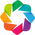

In [ ]:
# parametros de configuración para visualizar el diagrama de cuerdas
hv.extension('bokeh') # podemos remplazarlo por hv.extension('matplotlib'); las visualización será diferente
hv.output(size=300)

In [ ]:
# creamos una lista de diccionarios que contienen el nombre de cada nodo
nodes = [{"name": k} for k,v in mapping.items()]

# los convertimos en un hv.Dataset y podemos inspeccionarlos
nodes = hv.Dataset(pd.DataFrame(nodes), 'index')
nodes.data

,name
0,Andalucía
1,Aragón
2,"Asturias, Principado de"
3,"Balears, Illes"
4,Canarias
5,Cantabria
6,Castilla y León
7,Castilla - La Mancha
8,Cataluña
9,Comunitat Valenciana


In [ ]:
# creamos el diagrama de cuerdas con el dataframe que acabamos de crear y la lista de nodos
chord = hv.Chord(
    data=(df_2024M03, nodes),
    )

# especificamos parametros adicionales para formatear el diagrama
chord.opts(
    opts.Chord(
        cmap='Category20', # podemos cambiar el mapeado de colores (color map > cmap), por ejemplo, podemos poner 'Set1'
        edge_cmap='Category20',
        edge_color=dim('source').str(),
        labels='name',
        node_color=dim('index').str(),
        title="Diagrama de cuerdas que muestra el flujo de turistas en marzo 2024 agregado por comunidades autónomas"
        )
    )

:Chord   [source,target]   (value)

**¿Cómo interpretar el gráfico?**

En el diagrama de cuerdas se visualizan los flujos de turistas entres todas las CCAA. Podemos pinchar en una CA, por ejemplo, en la Comunitat Valenciana, y podremos ver lo siguiente:
- las cuerdas de color lila, que es el color de este nodo, simbolizan los turistas que salen de la Comunitat Valencia a otras CA o que se quedan dentro de la misma CA.
- las cuerdas de otros colores simbolizan los turistas que llegan de las otras CCAA a la Comunitar Valenciana. Podemos ver que la cuerda más grande es la que simboliza el flujo de turistas de Madrid a la Comunitat Valenciana.

Otra observación que podemos hacer, es que los andaluces y los catalanes viajan mucho dentro de su propia CA.

**Vamos a cambiar el perido de análisis a agosto de 2023 para visualizar los flujos de turistas entre CCAA en verano.**

Podremos observar que a grandes rasgos no cambian los movimientos de los turistas, solo que se intensifican los movimientos que ya hemos podido obervar para marzo 2024.


#### Cambiar el periodo de análisis


In [ ]:
# cambiamos el periodo de analis a agosto de 2023
df_2023M08 = get_edges(
    df=df,
    name2id=mapping,
    time_period="2023M08",
    )

In [ ]:
# creamos el diagrama de cuerdas con el dataframe que acabamos de crear y la lista de nodos
chord = hv.Chord((df_2023M08, nodes))

# especificamos parametros adicionales para formatear el diagrama
chord.opts(
    opts.Chord(
        cmap='Category20',
        edge_cmap='Category20',
        edge_color=dim('source').str(),
        labels='name',
        node_color=dim('index').str(),
        title="Diagrama de cuerdas que muestra el flujo de turistas en agosto 2023 agregado por comunidades autónomas"
        )
    )

:Chord   [source,target]   (value)

### Diagrama de Sankey

Con el dataframe que hemos creado arriba, que contiene los flujos de turistas de agosto de 2023, podemos crear un diagrama de Sankey para analizar con más detalle los flujos de turistas que llegan a la Comunitat Valenciana. Para ello tenemos que extraer de los datos solo las aristas que estén relacionadas con la Comunitat Valenciana, darles el formato adecuado y crear el diagrama de Sankey.

Una vez analizadas las CCAA de las que vienen más turistas a la Comunitat Valenciana podremos plantear un análisis más detallado por provincias.

In [ ]:
# para el diagrama de sankey necesitamos una lista de listas que contengan 'source', 'target' y 'value'
# podemos extraer la lista con este formato del dataframe que hemos creado
edges = df_2023M08.to_dict(orient="split")["data"]

In [ ]:
# extraemos el indice de la Comunidat Valenciana, o de la que nos interse, del mapeado
index = mapping["Comunitat Valenciana"]
index

9

In [ ]:
# filtramos las aristas para obtener solo las que terminan en la Comunitat Valenciana
# quitamos la mención de los turistas que van de la Comunitat Valenciana a la misma, ya que la librería no nos dejará visualizarlo
val_edges = [
    edge for edge in edges # nos quedamos con las aristas que..
    if edge[1] == index # como target tienen el index de la CA que nos interesa
    and edge[0] != index # y que como source no tienen la CA que nos interesa
    ]
val_edges

[[0, 9, 107739],
 [1, 9, 112467],
 [2, 9, 13555],
 [3, 9, 21775],
 [4, 9, 9213],
 [5, 9, 6940],
 [6, 9, 77043],
 [7, 9, 227395],
 [8, 9, 221296],
 [10, 9, 14014],
 [11, 9, 19759],
 [12, 9, 794144],
 [13, 9, 197860],
 [14, 9, 23918],
 [15, 9, 63519],
 [16, 9, 14342],
 [17, 9, 292],
 [18, 9, 943]]

In [ ]:
# enumeramos la lista de nombre de CCAA y la convertimos en un hv.Dataset que tenga las columnas 'index' y 'label
nodes = hv.Dataset(enumerate(list(mapping.keys())), 'index', 'label')
nodes.data

,index,label
0,0,Andalucía
1,1,Aragón
2,2,"Asturias, Principado de"
3,3,"Balears, Illes"
4,4,Canarias
5,5,Cantabria
6,6,Castilla y León
7,7,Castilla - La Mancha
8,8,Cataluña
9,9,Comunitat Valenciana


Pintamos el gráfico, y, como era de esperar, podemos observar que la mayoría de los turistas que llegan a la Comunitat Valenciana son provenientes de Madrid.

Si quisieramos, podríamos repetir este análisis con los veranos anteriores, creando un nuevo dataframe con nuestra función ``get_edges()``, indicando otro año y mes para la variable ``time_period``.

In [ ]:
hv.output(size=200)

value_dim = hv.Dimension('Personas')

sankey = hv.Sankey(
    data=(val_edges, nodes),
    kdims=['From', 'To'],
    vdims=value_dim,
    )

sankey.opts(
    opts.Sankey(
        labels='label',
        label_position='outer', # indicamos que las etiquetas tienen que visualizarse afuera del gráfico
        width=700, # podemos hacer el gráfico más grande o pequeño jugando con estos parámetros
        height=400,
        cmap='Category20', # podemos indicar otro mapeado de colores (color map > cmap), por ejemplo, 'Set3' o 'glasbey_light'
        edge_color=dim('From').str(),
        node_color=dim('index').str(),
        title="Diagrama de Sankey que muestra el flujo de turistas en agosto 2023 con destino a la Comunitat Valenciana"
        ),
    )


:Sankey   [From,To]   (Personas)

#### Análisis por provincias

Para poder hacer un análisis por provincia tendremos que obtener el mismo formato que usamos para crear el diagrama de Sankey arriba, que es una lista de listas que cada una contiene ``[source, target, value]``.

Para poder crear esta lista extraemos primero de nuestro dataframe inicial los valores que nos interesan y los guardamos en un dataframe más pequeño. Cuando tengamos este dataframe con información a nivel de provincias, ejecutaremos los mismos pasos que hemos ejecutado arriba para crear el diagrama de Sankey de los turistas que llegan a al Comunitat Valenciana.


In [ ]:
# filtramos el dataframe inicial para obtener la información relevante para el análisis a nivel de provincia
df_provincias = df.loc[
  (df["Periodo"] == "2023M08") & # indicamos el período de tiempo que nos interesa
   (df["Destino"] == "Comunitat Valenciana") & # filtramos por los movimientos que terminan en la Comunitat Valenciana
    (df["Origen"] != "Total Nacional") & # donde el origen no sea el valor total a nivel nacional
     (~pd.isna(df["Provincia de destino"])) & # donde la provincia de destino no está vacía
      (~pd.isna(df["Total"])) # donde el número de turistas no se NaN (valor que se da cuando el número de turistas es 0)
  ]

df_provincias = df_provincias.drop( # omitimos las columnas que no son relevantes
    columns=["Provincia de origen", "Destino", "Periodo"]
    )

df_provincias = df_provincias.rename( # renombramos nuestras columnas para seguir el esquema 'source, target, value'
    columns={
        "Origen": "source",
        "Provincia de destino": "target",
        "Total": "value",
        }
    )


Para crear nuestro diagrama de Sankey a nivel de provincias, tenemos que incluir los nombres de las provincias en el mapeado de nombres a enteros.

In [ ]:
# identificamos los valores únicos en la columna que son nuestras provincias
list(df_provincias["target"].unique())

['Alicante/Alacant', 'Castellón/Castelló', 'Valencia/València']

In [ ]:
# la añadimos al mapeado (se podría hacer programáticamente también)
mapping["Alicante/Alacant"] = 19
mapping["Castellón/Castelló"] = 20
mapping["Valencia/València"] = 21

# enumeramos la lista de nombre de CCAA y provincias y la convertimos en un hv.Dataset que tenga las columnas 'index' y 'label
nodes = hv.Dataset(enumerate(list(mapping.keys())), 'index', 'label')

# visualizamos el final del dataset de nodos que hemos creado y veremos las provincias que hemos añadido
nodes.data.tail()

,index,label
17,17,Ceuta
18,18,Melilla
19,19,Alicante/Alacant
20,20,Castellón/Castelló
21,21,Valencia/València


In [ ]:
  # convertimos los valores en la columna value, el número de turistas, de floats e enteros
  df_provincias["value"] = df_provincias["value"].apply(
        lambda x: int(x)
            )
  # mapeamos los nombres de las CCAA de origen a enteros
  df_provincias["source"] = df_provincias["source"].apply(
      lambda x: mapping[x]
          )

  # mapeamos los nombres de las provincias de destino a enteros
  df_provincias["target"] = df_provincias["target"].apply(
      lambda x: mapping[x]
          )


In [ ]:
# extraemos la lista de listas con formato [source, target, value] del dataframe que hemos creaod
edges_provincias = df_provincias.to_dict(orient="split")["data"]

Pintamos el gráfico y podemos observar que, como ya sabíamos, el mayor número de turistas proviene de la Comunidad de Madrid. Sin embargo, podemos observar que esto no es cierto para la provincia de Castellón, donde la mayoría de turistas son valencianos.

In [ ]:
hv.output(size=200)
value_dim = hv.Dimension('Personas')

sankey = hv.Sankey(
    data=(edges_provincias, nodes),
    kdims=['From', 'To'],
    vdims=value_dim,
    )

sankey.opts(
    opts.Sankey(
        labels='label',
        label_position='outer', # indicamos que las etiquetas tienen que visualizarse afuera del gráfico
        width=700, # podemos hacer el gráfico más grande o pequeño jugando con estos parámetros
        height=400,
        cmap='Set3', # podemos indicar otro mapeado de colores (color map > cmap), por ejemplo, 'Category20' o 'glasbey_light'
        edge_color=dim('From').str(),
        node_color=dim('index').str(),
        title="Diagrama de Sankey agosto 2023 que muestra el flujo de turistas con destino a provincias de la Comunitat Valenciana",
        ),
    )

:Sankey   [From,To]   (Personas)